# Credit Card Segmentation

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [74]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [75]:
# Converting column names to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

In [76]:
df[df['credit_limit'].isnull()]

# Filling the missing values with the mean of the column
df['credit_limit'].fillna(df['credit_limit'].mean(), inplace=True)
df.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          0
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

## Clustering

In [77]:
selected_columns = df[['credit_limit', 'balance', 'cash_advance', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance_trx', 'purchases_trx']]
selected_columns.head()

,credit_limit,balance,cash_advance,purchases,oneoff_purchases,installments_purchases,cash_advance_trx,purchases_trx
0,1000.0,40.900749,0.000000,95.40,0.00,95.4,0,2
1,7000.0,3202.467416,6442.945483,0.00,0.00,0.0,4,0
2,7500.0,2495.148862,0.000000,773.17,773.17,0.0,0,12
3,7500.0,1666.670542,205.788017,1499.00,1499.00,0.0,1,1
4,1200.0,817.714335,0.000000,16.00,16.00,0.0,0,1


In [78]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected_columns)
X_feature = pd.DataFrame(X_scaled, columns=selected_columns.columns)
X_feature.head()

,credit_limit,balance,cash_advance,purchases,oneoff_purchases,installments_purchases,cash_advance_trx,purchases_trx
0,-0.960433,-0.731989,-0.466786,-0.424900,-0.356934,-0.349079,-0.476070,-0.511333
1,0.688639,0.786961,2.605605,-0.469552,-0.356934,-0.454576,0.110074,-0.591796
2,0.826062,0.447135,-0.466786,-0.107668,0.108889,-0.454576,-0.476070,-0.109020
3,0.826062,0.049099,-0.368653,0.232058,0.546189,-0.454576,-0.329534,-0.551565
4,-0.905464,-0.358775,-0.466786,-0.462063,-0.347294,-0.454576,-0.476070,-0.551565


#### Selecting the optimal K

In [79]:
wcss = []
from sklearn.cluster import KMeans
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_feature)
    wcss.append(kmeans.inertia_)
wcss

[71600.00000000001,
 56126.77289229197,
 43906.82061392289,
 37848.42612986843,
 34146.23652717288,
 31298.12700813275,
 29260.207636324703,
 27168.871084843122,
 25425.570450129544,
 24278.96562965886]

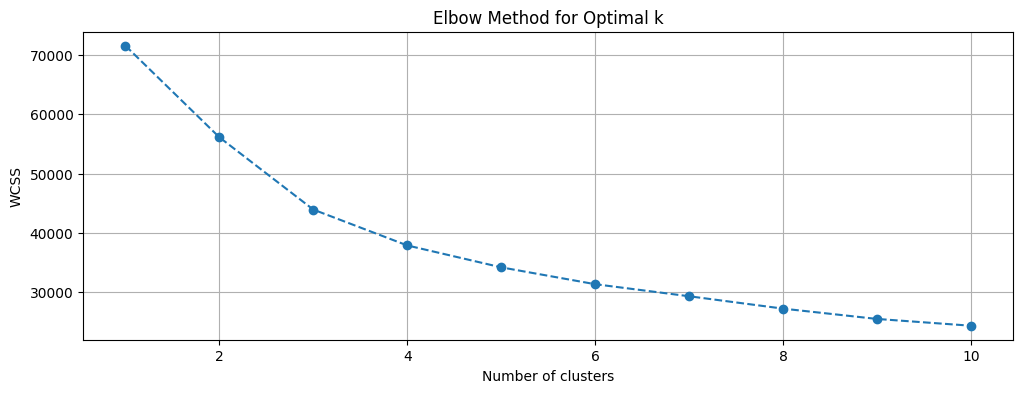

In [80]:
# Visualizing the elbow method
plt.figure(figsize=(12, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [81]:
# Silhouette Score
#from sklearn.metrics import silhouette_score
#silhouette_scores = []
#for i in range(2, 11):
    #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    #kmeans.fit(X_feature)
    #silhouette_scores.append(silhouette_score(X_feature, kmeans.labels_))
#silhouette_scores

In [82]:
# Silhouette Score
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_feature)
    score = silhouette_score(X_feature, labels)
    print(f'Silhouette score for k={i}: {score:.3f}')

Silhouette score for k=2: 0.605
Silhouette score for k=3: 0.488
Silhouette score for k=4: 0.487
Silhouette score for k=5: 0.333
Silhouette score for k=6: 0.346
Silhouette score for k=7: 0.306
Silhouette score for k=8: 0.300
Silhouette score for k=9: 0.311
Silhouette score for k=10: 0.307


In [83]:
# Using the optimal number of clusters (k=2) based on the elbow method and silhouette score
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
k_pred = kmeans.fit_predict(X_feature)
# Adding the cluster labels to the original data
X_feature['cluster'] = k_pred
X_feature.head()

,credit_limit,balance,cash_advance,purchases,oneoff_purchases,installments_purchases,cash_advance_trx,purchases_trx,cluster
0,-0.960433,-0.731989,-0.466786,-0.424900,-0.356934,-0.349079,-0.476070,-0.511333,0
1,0.688639,0.786961,2.605605,-0.469552,-0.356934,-0.454576,0.110074,-0.591796,0
2,0.826062,0.447135,-0.466786,-0.107668,0.108889,-0.454576,-0.476070,-0.109020,0
3,0.826062,0.049099,-0.368653,0.232058,0.546189,-0.454576,-0.329534,-0.551565,0
4,-0.905464,-0.358775,-0.466786,-0.462063,-0.347294,-0.454576,-0.476070,-0.551565,0


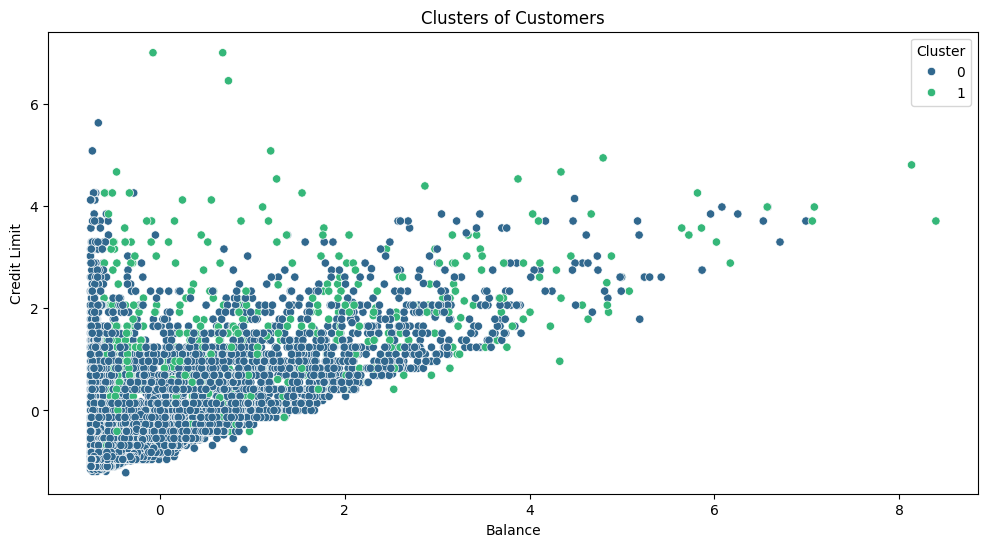

In [84]:
# Visualizing the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=X_feature, x='balance', y='credit_limit', hue='cluster', palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Balance')
plt.ylabel('Credit Limit')
plt.legend(title='Cluster')
plt.show()

In [85]:
X_feature['cluster'].value_counts()

cluster
0    8359
1     591
Name: count, dtype: int64